# Python Implementation of Perlin Noise

### What is Perlin Noise? Who made it?
Perlin noise is an algorithm for generating pseudo- random noise that was created by Ken Perlin in 1983. Ken Perlin developed the algorithm due to his frustration with the "machine- like" look of computer generated imagery (CGI) at the time [1]. Perlin noise allows for the generation of a procedural, gradient and natural looking noise for any number of dimensions.

### Is Perlin noise similar to random noise?
It is important to not confuse Perlin noise with random noise. Random noise generates values that are not correlated  to each other. For example, if we were to look at a pixel in an image of random noise, we can not predict the colors of it neighboring  pixels. On the other hand if we were to look at a pixel in an image of perlin noise, we can predict that its neighboring  pixels will be either slightly darker or lighter in color as perlin noise makes smooth transitions from one value to another. Below is a figure that compares an image of perlin noise to an image of random noise.
    

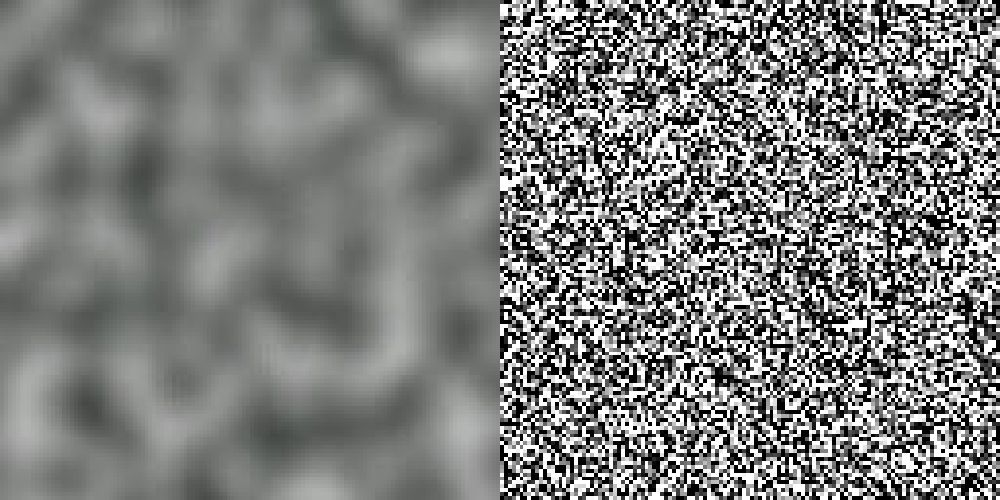

Fig. 1 Comparison between perlin noise (left) and random noise (right) [2]

### Cool, but how does Perlin noise work?
This will be an explanation of how two dimensional Perlin noise is generated, the algorithm remains the same for any dimensions but visualizing it in two dimensions is easier. 
First let's assume we have a canvas made up of pixels on which we wish to generate Perlin noise. Now we imagine a grid of unit squares on top of the canvas (in a three dimensional Perlin noise unit cubes are used). The total number of unit squares in the grid is an integer value and they can be from one single unit square that encompasses the entire canvas to as many as you wish, be it two, four, eight, sixteen or more. How the number of unit squares affects the final result will be explained later. The next figure shows an example of a grid of unit squares as well as random gradient vectors for every corner and intersection. What's a gradient vector? You will find out now.
 
After defining the grid of unit squares over the canvas, the next step is to generate a random vector for every corner or intersection in the grid of unit squares, so for example if we have a two by two grid of unit squares, we need to generate nine random vectors as there are four corners and five intersections. These vectors are where the randomness in Perlin noise comes from and they are called gradient vectors.

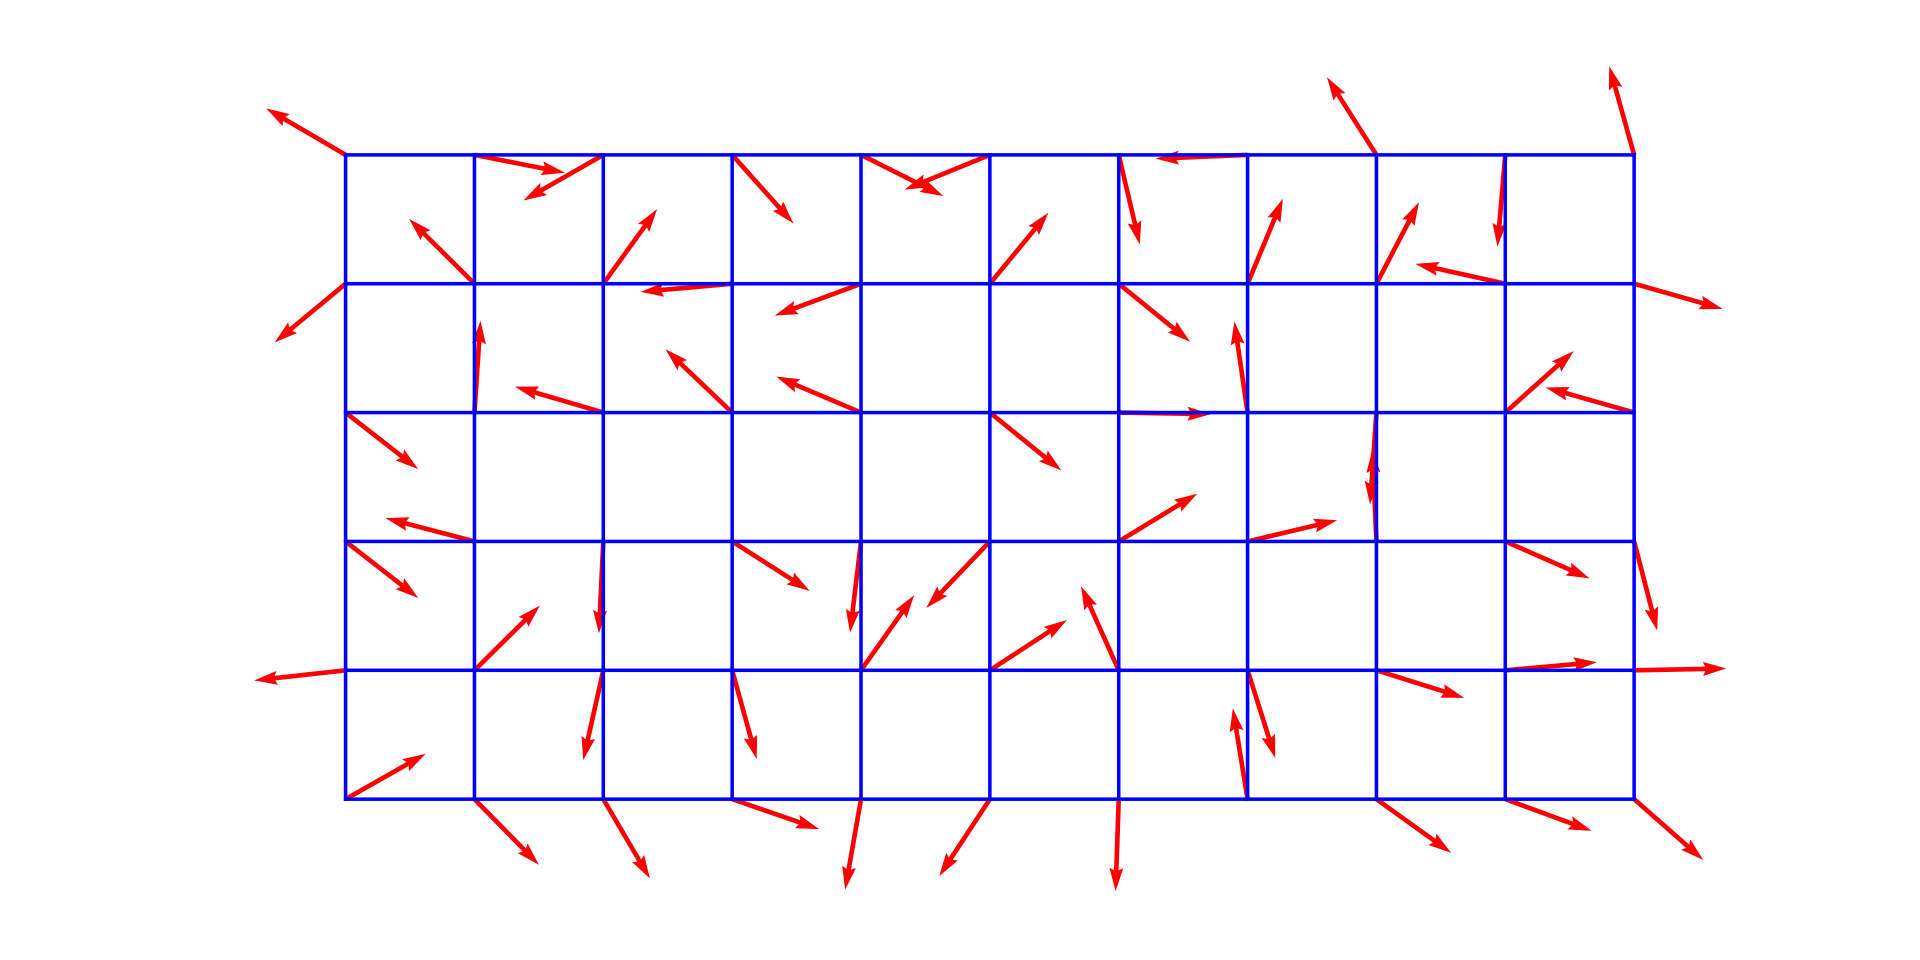

Fig. 2 A grid of unit squares and random gradient vectors for each corner and intersection
https://en.wikipedia.org/wiki/Perlin_noise#/media/File:PerlinNoiseGradientGrid.svg

With the grid of unit squares and gradient vectors defined, to start generating Perlin noise, we now need to take a pixel of the canvas and calculate the value of Perlin noise for that specific pixel, by repeating the following algorithm for the rest of the pixels we get our Perlin noise. Note that the grid and gradient vectors remain the same for every pixel of the canvas, we do not generate new one for each pixel. So to get the value of Perlin noise at a specific pixel we start by taking the $(x, y)$ position for the specific pixel and through its position we determine in which unit square it lays in and calculate the coordinates of that unit square's four corners. After calculating the coordinates of the unit square's corners we use them to calculate four vectors that point from the corners of the unit square to the position of the pixel, these are known as distance vectors. These four distance vectors can be calculated like this:
$$ d_0 = (x, y) - (x_0, y_0); $$
$$ d_1 = (x, y) - (x_1, y_0); $$
$$ d_2 = (x, y) - (x_0, y_1); $$
$$ d_3 = (x, y) - (x_1, y_1); $$
where $(x, y)$ is the position of the pixel, $(x_0, y_0)$ is the position of the bottom left corner, $(x_1, x_0)$ is the position of the bottom right corner, etc. Below is a figure illustrating the four distance vector from the corners of the unit square to the pixel position while the next figure shows the same unit square alongside its four gradient vectors on each of its corners.

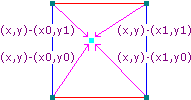

Fig. 3 Distance vectors from the corners of the unit square to the pixel we are calculating for [5]

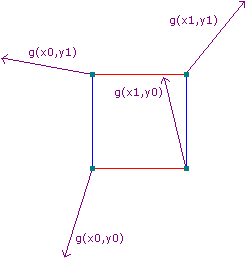

Fig. 4 The gradient vectors for the four corners of the unit square [5]

We also need to calculate relative $(x, y)$ values for the location of the pixel within the unit square it lays in. These new $(x, y)$ values describe its location inside the unit square and not on the canvas as a whole.

So now with the grid and gradient vectors defined, the distance vectors and relative coordinates of the pixel calculated, we have all the necessities to calculate the value of Perlin noise of that pixel. We start by calculating the vector dot product of all four distance vectors with the respecitive gradient vectors of the specific unit square the pixel lays in, for example, we get the dot product between the distance vector from the top left corner of the unit cube to the pixel and the top left gradient vector of the same unit cube, we repeat this for the remaining three dot products:
$$ dot_0 = d_{0(x)}*g_{0(x)} +d_{0(y)}*g_{0(y)}; $$
$$ dot_1 = d_{1(x)}*g_{1(x)} +d_{1(y)}*g_{1(y)}; $$
$$ dot_2 = d_{2(x)}*g_{2(x)} +d_{2(y)}*g_{2(y)}; $$
$$ dot_3 = d_{3(x)}*g_{3(x)} +d_{3(y)}*g_{3(y)}; $$
where $d_0, d_1, d_2, d_3$ are the distance vectors, $g_0, g_1, g_2, g_3$ are the gradient vectors and $dot_0, dot_1, dot_2, dot_3$ simply stands for dot product one, two, three and four.

With the dot products calculated, we need to turn these four values into a single value by linearly interpolating between the four dot products. We need to perform three linear interpolations in total, the first of which gives us a value between the first two dot products we calculated, the second linear interpolation gives us a value between the last two dot products, while the third linear interpoation gives us a value between the first two interpolated values, all three interpolations depend on the relative $(x, y)$ position of the pixel within the unit square it lays in.
The formula for linear interplation is:
$$ a + (b - a) * t; $$
so the three linear interplations we need are calculated like this:
$$val_1 = dot_0 + (dot_1 - dot_0) * x; $$
$$val_2 = dot_2 + (dot_3 - dot_2) * x; $$
$$perlin_noise_value = val_1 + (val_2 - val_1) * y; $$
where $x$ and $y$ are the relative coordinates of the pixel inside of the unit square and as the name suggests, we finally have the value of Perlin noise at that pixel after the third linear interpolation. Now we need to repeat the exact same process for every other pixel in the canvas to get our full final image. The figure bellow is an image of Perlin noise generated using this algorithm.

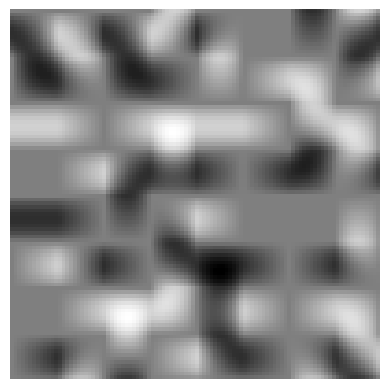

Fig. 5 Perlin noise without ease function

### Why does the Perlin noise look "blocky"?
So by following the formulas above the resulting Perlin noise that we got obviously doesn't seem right, it isn't smooth but its blocky. Why is that?
It is all because of the linear interpolation. By just normally interpolating between the values we get sharp edges like that. The solution to that is the following:
$$val_1 = dot_0 + (dot_1 - dot_0) * x; $$
$$val_2 = dot_2 + (dot_3 - dot_2) * x; $$
$$perlin_noise_value = val_1 + (val_2 - val_1) * y; $$
these are the formulas we use to linearly interpolate between the values and into them we input the relative to the unit square $(x, y)$ position of the pixel, doing it like that, if we take a cross- section of the perlin noise, it will look something like the figure bellow.

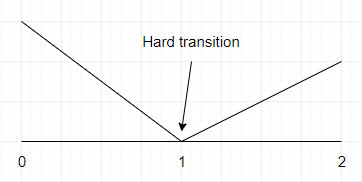

Fig. 6 Hard transition [4]

Instead of inputing the relative $(x, y)$ of the pixel directly into the interpolation formula, we can first modify them in a way to smooth out the interpolation. We do that with a so called ease function which has the following formula:
$$ 6*t^5 + 15t^4 + 10t^3 $$
this function gives us a smooth non- linear transition from zero when $t=0$ to one when $t=1$. We input the relative $(x, y)$ values of the pixel into this function, and its result we use as an input for the linear interpolation, something like this:
$$t_x = 6*x^5 + 15x^4 + 10x^3;$$
$$t_y = 6*y^5 + 15y^4 + 10y^3;$$
$$val_1 = dot_0 + (dot_1 - dot_0) * t_x; $$
$$val_2 = dot_2 + (dot_3 - dot_2) * t_x; $$
$$PerlinNoiseValue = val_1 + (val_2 - val_1) * t_y; $$
in the end by doing the interpolation this way we get transitions like the one shown in the figure bellow.

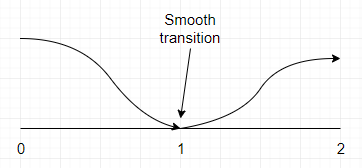

Fig. 7 Smooth transition using the ease function [4]

And heere is a figure of Perlin noise generated with the ease function.

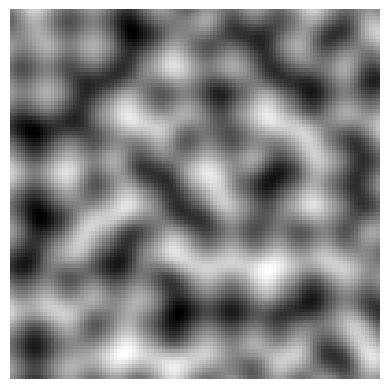

Fig. 8 Perlin noise generated using the ease function.

### What's an octave in perlin noise?
Remember when I said that how the number of unit squares over the canvas affects the generated Perlin noise? I will explain it now. The figure bellow shows images of Perlin noise generated for a different number of unit squares in the grid, starting from one unit sqaure in the grid, then four unit squares, nine, etc.

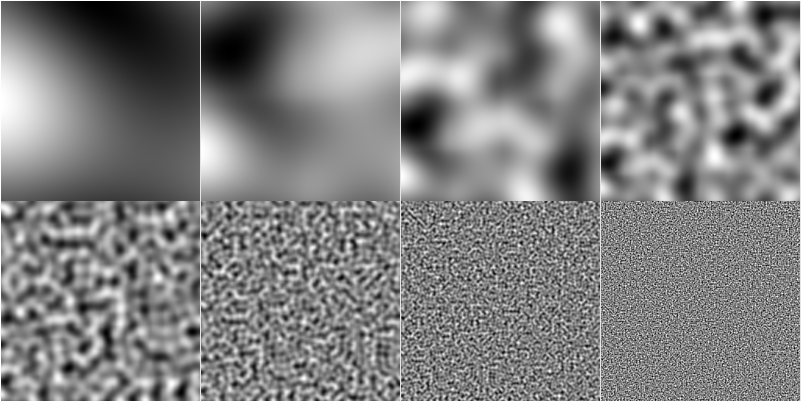

Fig. 9 Perlin noise calculated for different octaves              
https://i.sstatic.net/icQbK.png

Notice how the noise becomes more and more detailed? Basically the more unit squares our grid is made up of, the more detail we get in our noise. Instead of having to keep saying "number of unit squares" we can use the term octave, where one octave is the same as just one square, two octave perlin noise means we used a grid of four unit squares, etc, the higher the octaves, the more detail we get in the noise.

Some of the Perlin noise you might come across could actually be a combination of different Perlin noises of different octaves added on to each other to create an interesting and unique look

### So what can I do with Perlin noise?
Well for example if you are a game developer, Perlin noise can be the way you generate the terrain in your game, and by tweaking the parameters of your Perlin noise, you can make the terrain as detailed or simple as you want. Or you can use it to generate clouds instead or other game assets that you might need. If you are a 3D modeler you can use and tune Perlin noise to generate a texture for your models suited to your needs. If you are a digital artist, most graphic design software give you the ability to generate perlin noise onto your image which might help you draw natural looking shapes and textures in your drawing. Perlin noise was originally created as a way to generate natural textures and looks better than what the computer generated imagery at the time could. [1] 

Really the uses ot Perlin noises are only limited by your creativity.

### Python implementation of Perlin noise
Below I have written some python code that generates Perlin noise, first is code that generates a single image of Perlin noise and later I have written code that generates animation of Perlin noise. I just want to point out that the code I wrote isn't perfect and is probably inefficient but I believe it succeeds in giving a good demonstration of the principles behind Perlin noise generation albeit with some differences between my code and the original code implementation by Ken Perlin which I will explain below.

For example to get random gradient vectors in my program a list of the four diagonal unit vectors is defined $(\sqrt(2),\sqrt(2)),(-\sqrt(2),\sqrt(2)),(\sqrt(2),-\sqrt(2)),(-\sqrt(2),-\sqrt(2))$ after which another list is created that contains the gradient vectors, and each gradient vector in this new list is randomly given the value of one of the vectors in the diagonal unit vector list by using the random's library randint() function which I set to give us a random integer between 0 and 3. Ken Perlin's implementation also assigns values to its gradient vectors from four predetermined diagonal vectors but in his program, he uses a hash function to determine a value for each gradient vector, while in this program I use a random number function, so this implementation isn't the same as the original.

### Generating a single image of Perlin noise
The code bellow gives us a black and white image of perlin noise. The resulting Perlin noise values are normalized between the values -1 and 1, same goes for the results of the functions after this one. Feel free to play around with the varibles used in calling the function to see what results you get.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
def ease(t):
    return t * t * t * (t * (t * 6 - 15) + 10)

def lerp(a, b, t):
    return a + t * (b - a)

In [3]:
def perlin(width, height, octaves):
    noise = np.zeros((height, width))

    G = [[0.7071, 0.7071], [-0.7071, 0.7071], [0.7071, -0.7071], [-0.7071, -0.7071]]
    gradients = [[G[random.randint(0, 3)] for i in range(octaves + 1)] for j in range(octaves + 1)]
    # pick random vector form list of diagonal unit vectors G for every interection of unit squares
    
    for x in range(width): # iterates each pixel in x axis
        x_coord = x * octaves / width
        x_pos_of_unit_square = int(x_coord // 1)
        x_coord_in_square = x_coord % 1
        for y in range(height): # iterates each pixel in y axis
            y_coord = y * octaves / height
            y_pos_of_unit_square = int(y_coord // 1) # range of x/y_pos_of_unit_square [0, scale - 1]. The coordinates given by x/y_pos_of_unit_square are the coordinates of its lower left corner
            y_coord_in_square = y_coord % 1
            
            d1 = [x_coord_in_square, y_coord_in_square]
            d2 = [x_coord_in_square - 1, y_coord_in_square]
            dot1 = np.dot(d1, gradients[x_pos_of_unit_square][y_pos_of_unit_square])
            dot2 = np.dot(d2, gradients[x_pos_of_unit_square + 1][y_pos_of_unit_square])
            interpolate_bottom = lerp(dot1, dot2, ease(x_coord_in_square))
         
            d3 = [x_coord_in_square, y_coord_in_square - 1]
            d4 = [x_coord_in_square - 1, y_coord_in_square - 1]
            dot3 = np.dot(d3, gradients[x_pos_of_unit_square][y_pos_of_unit_square + 1])
            dot4 = np.dot(d4, gradients[x_pos_of_unit_square + 1][y_pos_of_unit_square + 1])
            interpolate_top = lerp(dot3, dot4, ease(x_coord_in_square))
    
            interpolated_value_of_pixel = lerp(interpolate_bottom, interpolate_top, ease(y_coord_in_square))
    
            noise[y][x] = interpolated_value_of_pixel

    output_min = -1
    output_max = 1
    output_range = output_max - output_min
    noise_range = np.max(noise) - np.min(noise)
    normalized_noise = (((noise - np.min(noise)) * output_range) / noise_range) + output_min
    return normalized_noise

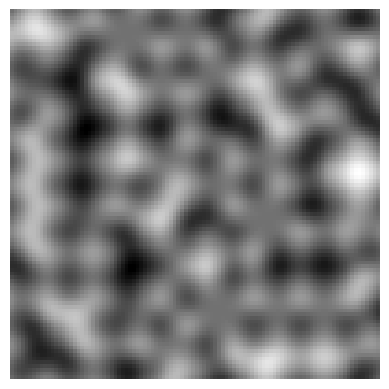

In [4]:
# run this cell for a new image, you can edit the variables bellow for different results

width, height, octaves = 100, 100, 8 
# width and height set resolution of image, octaves determine how "noisy" you want the Perlin noise

perlin_noise = perlin(width, height, octaves)
fig, ax = plt.subplots()
plt.imshow(perlin_noise, cmap = 'binary')
axis = plt.gca()
axis.set_xticklabels([]) 
axis.set_yticklabels([])
axis.set_xticks([])
axis.set_yticks([])
axis.set_aspect('equal')
axis.spines[["top", "right", "bottom", "left"]].set_visible(False)

This image of Perlin noise isnt too interesting but with the next three functions bellow I hope it can be seen that we can give many different unique looks to Perlin noise depending on how we tweak it.

### Generating an animation of Perlin noise
This code genereates an animation of however many frames we want of Perlin noise, where every frame the gradient vectors are rotated in a random direction in the range of -5 to 5 degrees.

In [5]:
def animated_perlin(width, height, octaves, frames):

    noise_animation = np.zeros((frames, height, width))

    G = [[0.7071, 0.7071], [-0.7071, 0.7071], [0.7071, -0.7071], [-0.7071, -0.7071]]
    gradients = [[G[random.randint(0, 3)] for i in range(octaves + 1)] for j in range(octaves + 1)]
    # pick random vector form list of diagonal unit vectors G for every interection of unit squares
    rotation_radians= [[np.random.rand() * 0.174 - 0.087 for i in range(octaves + 1)] for j in range(octaves + 1)]
    # defines a random value in range [-5 to 5) degrees by which a gradient vector will be rotated each frame for each gradient vector
    
    for f in range(frames):
        rotation_matrixes = [[[[np.cos(rotation_radians[i][j]*f), - np.sin(rotation_radians[i][j]*f)], [np.sin(rotation_radians[i][j]*f), np.cos(rotation_radians[i][j]*f)]] for i in range(octaves + 1)] for j in range(octaves + 1)]
        # defines rotation matrixes used for rotating the gradient vectors
        
        for x in range(width): # iterates each pixel in x axis
            x_coord = x * octaves / width
            x_pos_of_unit_square = int(x_coord // 1)
            x_coord_in_square = x_coord % 1
            for y in range(height): # iterates each pixel in y axis
                y_coord = y * octaves / height
                y_pos_of_unit_square = int(y_coord // 1) # range of x/y_pos_of_unit_square [0, scale - 1]. The coordinates given by x/y_pos_of_unit_square are the coordinates of its lower left corner
                y_coord_in_square = y_coord % 1
                
                d1 = [x_coord_in_square, y_coord_in_square]
                d2 = [x_coord_in_square - 1, y_coord_in_square]
                rotated_gradient1 = np.matmul(rotation_matrixes[x_pos_of_unit_square][y_pos_of_unit_square], gradients[x_pos_of_unit_square][y_pos_of_unit_square])
                rotated_gradient2 = np.matmul(rotation_matrixes[x_pos_of_unit_square + 1][y_pos_of_unit_square], gradients[x_pos_of_unit_square + 1][y_pos_of_unit_square])
                dot1 = np.dot(d1, rotated_gradient1)
                dot2 = np.dot(d2, rotated_gradient2)
                interpolate_bottom = lerp(dot1, dot2, ease(x_coord_in_square))
                
                d3 = [x_coord_in_square, y_coord_in_square - 1]
                d4 = [x_coord_in_square - 1, y_coord_in_square - 1]
                rotated_gradient3 = np.matmul(rotation_matrixes[x_pos_of_unit_square][y_pos_of_unit_square + 1], gradients[x_pos_of_unit_square][y_pos_of_unit_square + 1])
                rotated_gradient4 = np.matmul(rotation_matrixes[x_pos_of_unit_square + 1][y_pos_of_unit_square + 1], gradients[x_pos_of_unit_square + 1][y_pos_of_unit_square + 1])
                dot3 = np.dot(d3, rotated_gradient3)
                dot4 = np.dot(d4, rotated_gradient4)
                interpolate_top = lerp(dot3, dot4, ease(x_coord_in_square))
        
                interpolated_value_of_pixel = lerp(interpolate_bottom, interpolate_top, ease(y_coord_in_square))
    
                noise_animation[f][y][x] = interpolated_value_of_pixel
    output_min = -1
    output_max = 1
    output_range = output_max - output_min
    noise_animation_range = np.max(noise_animation) - np.min(noise_animation)
    normalized_noise_animation = (((noise_animation - np.min(noise_animation)) * output_range) / noise_animation_range) + output_min
    return normalized_noise_animation

In [12]:
# run this cell to generate an animation of Perlin noise, edit the variables bellow to get different results

width, height, octaves, frames = 50, 50, 3, 100
# width and height set resolution of image, octaves determine how "noisy" you want the Perlin noise, frames is the number of frames in the animation

perlin_noise = animated_perlin(width, height, octaves, frames)
perlin_noise_animation = []
fig, ax = plt.subplots()
ax.imshow(perlin_noise[0], cmap = 'Blues') #displays first frame

for f in range(frames):
    perlin_noise_frame = ax.imshow(perlin_noise[f], animated = True, cmap = 'Blues')
    perlin_noise_animation.append([perlin_noise_frame])
ani = animation.ArtistAnimation(fig, perlin_noise_animation, interval=50, blit=True, repeat_delay=1000)
axis = plt.gca()
axis.set_xticklabels([]) 
axis.set_yticklabels([])
axis.set_xticks([])
axis.set_yticks([])
axis.set_aspect('equal')
axis.spines[["top", "right", "bottom", "left"]].set_visible(False)
plt.close(ani._fig)
HTML(ani.to_jshtml())

Now this looks a little more interessting, and with these blue colors, it can be said that the animation somewhat looks like still water.

### Generating a different animation of Perlin noise
Difference between this code and the code above it is that in this one, we can set different octaves for the X and Y axis.

In [7]:
def animated_perlin2(width, height, octaves_x, octaves_y, frames):

    noise_animation = np.zeros((frames, height, width))

    G = [[0.7071, 0.7071], [-0.7071, 0.7071], [0.7071, -0.7071], [-0.7071, -0.7071]]
    gradients = [[G[random.randint(0, 3)] for i in range(octaves_y + 1)] for j in range(octaves_x + 1)]
    # pick random vector form list of diagonal unit vectors G for every interection of unit squares
    rotation_radians= [[np.random.rand() * 0.174 - 0.087 for i in range(octaves_y + 1)] for j in range(octaves_x + 1)]
    # defines a random value in range [-5 to 5) degrees by which a gradient vector will be rotated each frame for each gradient vector
    
    for f in range(frames):
        rotation_matrixes = [[[[np.cos(rotation_radians[j][i]*f), - np.sin(rotation_radians[j][i]*f)], [np.sin(rotation_radians[j][i]*f), np.cos(rotation_radians[j][i]*f)]] for i in range(octaves_y + 1)] for j in range(octaves_x + 1)]
        # defines rotation matrixes used for rotating the gradient vectors
        
        for x in range(width): # iterates each pixel in x axis
            x_coord = x * octaves_x / width
            x_pos_of_unit_square = int(x_coord // 1)
            x_coord_in_square = x_coord % 1
            for y in range(height): # iterates each pixel in y axis
                y_coord = y * octaves_y / height
                y_pos_of_unit_square = int(y_coord // 1) # range of x/y_pos_of_unit_square [0, scale - 1]. The coordinates given by x/y_pos_of_unit_square are the coordinates of its lower left corner
                y_coord_in_square = y_coord % 1
                
                d1 = [x_coord_in_square, y_coord_in_square]
                d2 = [x_coord_in_square - 1, y_coord_in_square]
                rotated_gradient1 = np.matmul(rotation_matrixes[x_pos_of_unit_square][y_pos_of_unit_square], gradients[x_pos_of_unit_square][y_pos_of_unit_square])
                rotated_gradient2 = np.matmul(rotation_matrixes[x_pos_of_unit_square + 1][y_pos_of_unit_square], gradients[x_pos_of_unit_square + 1][y_pos_of_unit_square])
                dot1 = np.dot(d1, rotated_gradient1)
                dot2 = np.dot(d2, rotated_gradient2)
                interpolate_bottom = lerp(dot1, dot2, ease(x_coord_in_square))
                
                d3 = [x_coord_in_square, y_coord_in_square - 1]
                d4 = [x_coord_in_square - 1, y_coord_in_square - 1]
                rotated_gradient3 = np.matmul(rotation_matrixes[x_pos_of_unit_square][y_pos_of_unit_square + 1], gradients[x_pos_of_unit_square][y_pos_of_unit_square + 1])
                rotated_gradient4 = np.matmul(rotation_matrixes[x_pos_of_unit_square + 1][y_pos_of_unit_square + 1], gradients[x_pos_of_unit_square + 1][y_pos_of_unit_square + 1])
                dot3 = np.dot(d3, rotated_gradient3)
                dot4 = np.dot(d4, rotated_gradient4)
                interpolate_top = lerp(dot3, dot4, ease(x_coord_in_square))
        
                interpolated_value_of_pixel = lerp(interpolate_bottom, interpolate_top, ease(y_coord_in_square))
    
                noise_animation[f][y][x] = interpolated_value_of_pixel
    output_min = -1
    output_max = 1
    output_range = output_max - output_min
    noise_animation_range = np.max(noise_animation) - np.min(noise_animation)
    normalized_noise_animation = (((noise_animation - np.min(noise_animation)) * output_range) / noise_animation_range) + output_min
    return normalized_noise_animation

In [8]:
# run this cell to generate image, edit variables bellow to tweak results
width, height, octaves_x, octaves_y, frames = 75, 75, 12, 1, 50

perlin_noise = animated_perlin2(width, height, octaves_x, octaves_y, frames)
perlin_noise_animation = []
fig, ax = plt.subplots()
ax.imshow(perlin_noise[0], cmap = 'Blues') #displays first frame

for f in range(frames):
    perlin_noise_frame = ax.imshow(perlin_noise[f], animated = True, cmap = 'Reds')
    perlin_noise_animation.append([perlin_noise_frame])
ani = animation.ArtistAnimation(fig, perlin_noise_animation, interval=50, blit=True, repeat_delay=1000)
axis = plt.gca()
axis.set_xticklabels([]) 
axis.set_yticklabels([])
axis.set_xticks([])
axis.set_yticks([])
axis.set_aspect('equal')
axis.spines[["top", "right", "bottom", "left"]].set_visible(False)
plt.close(ani._fig)
HTML(ani.to_jshtml())

By setting the ocatves in the X axis to 12 and the octaves in the Y axis to 1, we get something that resembles a waving curtain.

### Generating yet another different animation of Perlin noise
This last function generates an animation, each frame of which is made by combining multiple Perlin noise images generated for different octaves, giving us a unique look. The different Perlin noise images are calculated in the following order starting from one octave noise, then the second image is of four octave noise, then an image of nine octave noise, then an image of sixteen octave noise, with each consectuive image's amplitude of Perlin noise values being lower and lower with the one octave noise having the highest amplitude.

In [9]:
def animated_perlin3(width, height, scale, frames):

    noise_animation = np.zeros((frames, height, width))

    for s in range(scale):
        temp_noise_animation = np.zeros((frames, height, width))
        
        G = [[0.7071, 0.7071], [-0.7071, 0.7071], [0.7071, -0.7071], [-0.7071, -0.7071]]
        gradients = [[G[random.randint(0, 3)] for i in range(s**2 + 2)] for j in range(s**2 + 2)]
        # pick random vector form list of diagonal unit vectors G for every interection of unit squares
        rotation_radians= [[np.random.rand() * 0.174 - 0.087 for i in range(s**2 + 2)] for j in range(s**2 + 2)]
        # defines a random value in range [-5 to 5) degrees by which a gradient vector will be rotated each frame for each gradient vector
    
        for f in range(frames):
            rotation_matrixes = [[[[np.cos(rotation_radians[i][j]*f), - np.sin(rotation_radians[i][j]*f)], [np.sin(rotation_radians[i][j]*f), np.cos(rotation_radians[i][j]*f)]] for i in range(s**2 + 2)] for j in range(s**2 + 2)]
            # defines rotation matrixes used for rotating the gradient vectors
            
            for x in range(width): # iterates each pixel in x axis
                x_coord = x * (s**2 + 1) / width
                x_pos_of_unit_square = int(x_coord // 1)
                x_coord_in_square = x_coord % 1                    
                for y in range(height): # iterates each pixel in y axis
                    y_coord = y * (s**2 + 1) / height
                    y_pos_of_unit_square = int(y_coord // 1) # range of x/y_pos_of_unit_square [0, scale - 1]. The coordinates given by x/y_pos_of_unit_square are the coordinates of its lower left corner
                    y_coord_in_square = y_coord % 1
                    
                    d1 = [x_coord_in_square, y_coord_in_square]
                    d2 = [x_coord_in_square - 1, y_coord_in_square]
                    rotated_gradient1 = np.matmul(rotation_matrixes[x_pos_of_unit_square][y_pos_of_unit_square], gradients[x_pos_of_unit_square][y_pos_of_unit_square])
                    rotated_gradient2 = np.matmul(rotation_matrixes[x_pos_of_unit_square + 1][y_pos_of_unit_square], gradients[x_pos_of_unit_square + 1][y_pos_of_unit_square])
                    dot1 = np.dot(d1, rotated_gradient1)
                    dot2 = np.dot(d2, rotated_gradient2)
                    interpolate_bottom = lerp(dot1, dot2, ease(x_coord_in_square))
                        
                    d3 = [x_coord_in_square, y_coord_in_square - 1]
                    d4 = [x_coord_in_square - 1, y_coord_in_square - 1]
                    rotated_gradient3 = np.matmul(rotation_matrixes[x_pos_of_unit_square][y_pos_of_unit_square + 1], gradients[x_pos_of_unit_square][y_pos_of_unit_square + 1])
                    rotated_gradient4 = np.matmul(rotation_matrixes[x_pos_of_unit_square + 1][y_pos_of_unit_square + 1], gradients[x_pos_of_unit_square + 1][y_pos_of_unit_square + 1])
                    dot3 = np.dot(d3, rotated_gradient3)
                    dot4 = np.dot(d4, rotated_gradient4)
                    interpolate_top = lerp(dot3, dot4, ease(x_coord_in_square))
                
                    interpolated_value_of_pixel = lerp(interpolate_bottom, interpolate_top, ease(y_coord_in_square))
            
                    temp_noise_animation[f][y][x] = interpolated_value_of_pixel / (s/2 + 1)

        noise_animation += np.add(noise_animation, temp_noise_animation)
        
    output_min = -1
    output_max = 1
    output_range = output_max - output_min
    noise_animation_range = np.max(noise_animation) - np.min(noise_animation)
    normalized_noise_animation = (((noise_animation - np.min(noise_animation)) * output_range) / noise_animation_range) + output_min
    return noise_animation

In [11]:
width, height, scale, frames = 50, 50, 6, 100,
# if scale is set to 2, then each frame will be made of two noises, 1 and 4 octave noise
# if scale is set to 3, then each frame will be made of three noises, 1, 4 and 9 octave noise

perlin_noise = animated_perlin3(width, height, scale, frames)
perlin_noise_animation = []
fig, ax = plt.subplots()
ax.imshow(perlin_noise[0], cmap = 'Blues') #displays first frame
for f in range(frames):
    perlin_noise_frame = ax.imshow(perlin_noise[f], animated = True, cmap = 'Blues')
    perlin_noise_animation.append([perlin_noise_frame])

ani = animation.ArtistAnimation(fig, perlin_noise_animation, interval=50, blit=True, repeat_delay=1000)
axis = plt.gca()
axis.set_xticklabels([]) 
axis.set_yticklabels([])
axis.set_xticks([])
axis.set_yticks([])
axis.set_aspect('equal')
axis.spines[["top", "right", "bottom", "left"]].set_visible(False)
plt.close(ani._fig)
HTML(ani.to_jshtml())

The resulting noise with these colors resemble moving clouds in the sky. Even though this function is not efficient and a better one can be written, I believe this works as a proof of concept.

### Conclusion
Perlin noise is an algorithm for generating gradual and natural looking noise. It has found many uses in fields such as computer generated imagery and game development. By tweaking the paramters of Perlin noise such as the octaves, or the number of layered Perlin noises for different octaves we add up, we can generate varying and unique results not only in two dimensions but in one dimension, three and even more, so the applications for Perlin noise are only limited by your creativity.

### Citations and sources

[1] Ken Perlin. "Making Noise". noisemachine.com. Archived from the original on 8-th of October, 2007 

https://web.archive.org/web/20071011035810/http://noisemachine.com/talk1/

[2] Duncan Geree. "Height Noise". duncangeere.com. 27-th of April 2020

https://blog.duncangeere.com/height-noise/

[3] Ken Perlin. "Improving Noise". SIGGRAPH. 2002

https://mrl.cs.nyu.edu/~perlin/paper445.pdf

[4] Raouf Touti. rtouti.github.io. "Perlin Noise: A Procedural Generation Algorithm"

https://rtouti.github.io/graphics/perlin-noise-algorithm

[5]  Flafla2. "Understanding Perlin Noise". adrianb.io. 9-th of August 2014

https://adrianb.io/2014/08/09/perlinnoise.html